In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
3,33,male,22.71,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.54830
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [5]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
df.sort_values(by=['charges','children'], ascending=False)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801
1300,45,male,30.36,0,yes,southeast,62592.87309
1230,52,male,34.49,3,yes,northwest,60021.39897
577,31,female,38.10,1,yes,northeast,58571.07448
819,33,female,35.53,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
22,18,male,34.10,0,no,southeast,1137.01100
663,18,male,33.66,0,no,southeast,1136.39940
1244,18,male,33.33,0,no,southeast,1135.94070
808,18,male,30.14,0,no,southeast,1131.50660


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
region = df['region'].value_counts()
region

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [10]:
smokers = df['smoker'].value_counts()

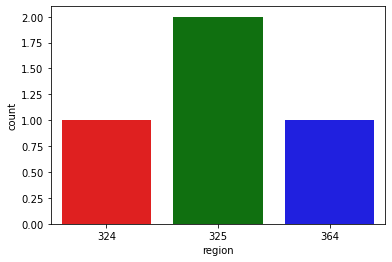

In [11]:
sns.countplot(region, palette = ["red", "green", "blue", "yellow"])

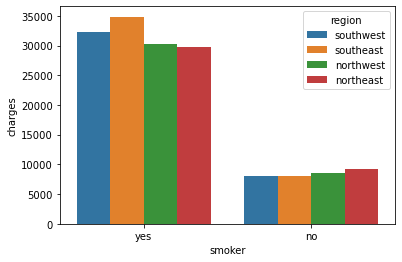

In [12]:
sns.barplot(x=df['smoker'], y=df['charges'], data=df, hue='region', ci=False)

In [13]:
mask = df['smoker']=='yes'

In [14]:
smokers = df[mask]
smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
11,62,female,26.29,0,yes,southeast,27808.72510
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
23,34,female,31.92,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.70,2,yes,southwest,36397.57600
1314,30,female,23.66,3,yes,northwest,18765.87545
1321,62,male,26.70,0,yes,northeast,28101.33305
1323,42,female,40.37,2,yes,southeast,43896.37630


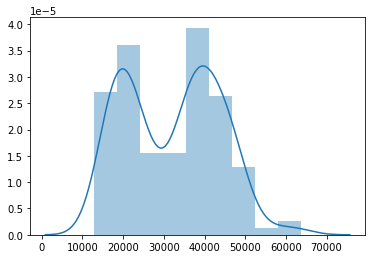

In [15]:
x = smokers['charges'].values
sns.distplot(x)

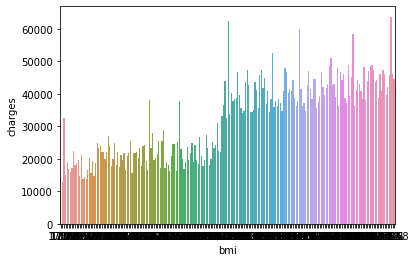

In [16]:
sns.barplot(x='bmi', y='charges', data=smokers,  ci=False)

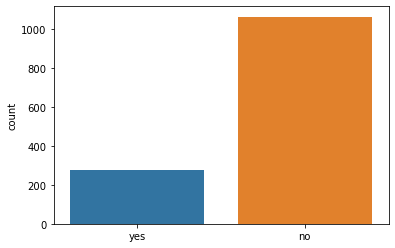

In [17]:
xm = smokers = df['smoker'].values
sns.countplot(xm)

In [18]:
smokers

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

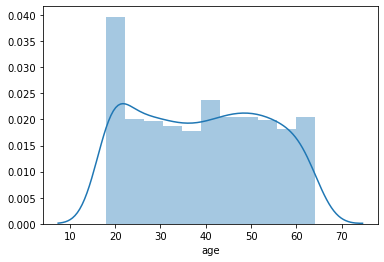

In [19]:
sns.distplot(df['age'])

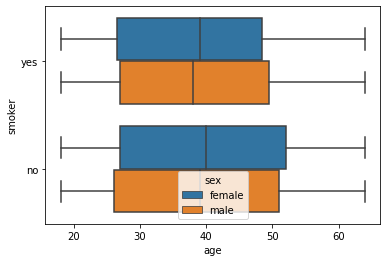

In [20]:
sns.boxplot( 'age', 'smoker', data=df, hue='sex')

In [21]:
df.groupby('sex').agg(np.mean)[['charges']].round(2)

,charges
sex,
female,12569.58
male,13956.75


In [22]:
df.groupby(['sex', 'smoker']).agg(np.mean)[['charges']].round(2)

charges
sex    smoker          
female no       8762.30
       yes     30679.00
male   no       8087.20
       yes     33042.01

In [23]:
test = df.groupby(['sex', 'smoker']).agg(np.mean)[['charges']].round(2)

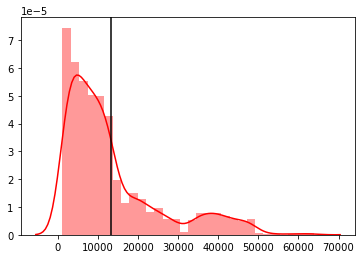

In [24]:
# Investigating the distribution of charges adding the mean
x = df['charges'].values

# Calculating the mean
mean = df['charges'].mean()

sns.distplot(x, color='red')

# plotting the mean

plt.axvline(mean,0, 1, color = 'black')

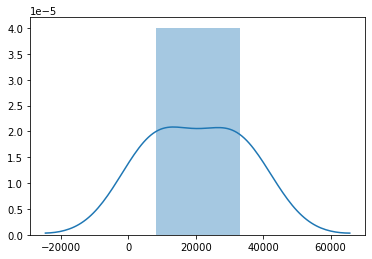

In [25]:
sns.distplot(test)

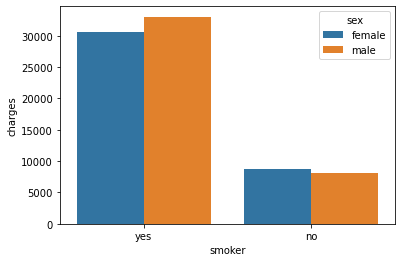

In [26]:
sns.barplot(x='smoker', y='charges', data=df, hue='sex', ci=False)

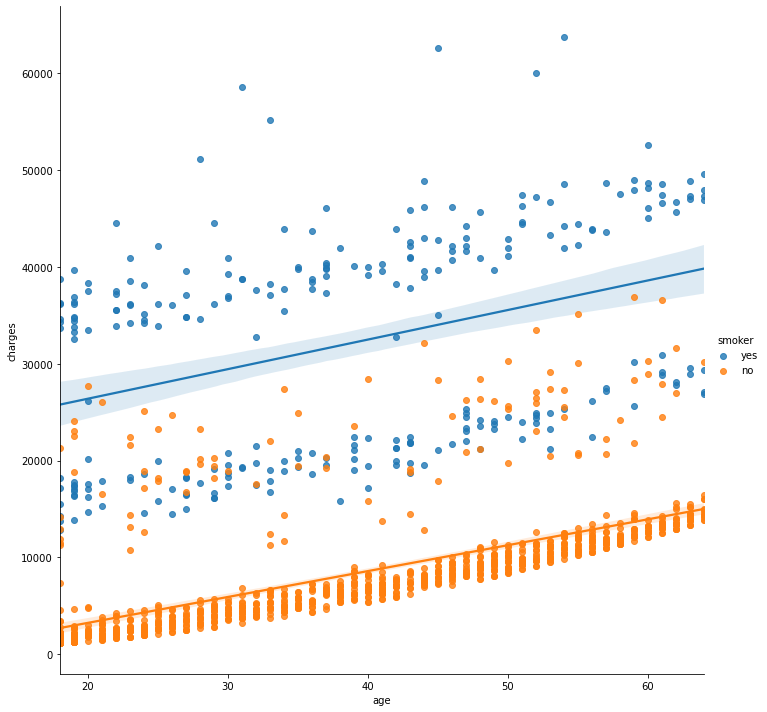

In [27]:
ax = sns.lmplot(x = "age", y = "charges", data = df, height = 10, aspect = 1, hue='smoker')

In [28]:
corr_men = df[['age', 'bmi', 'children','charges']].corr()
corr_men

,age,bmi,children,charges
age,1.000000,0.109277,0.042469,0.299008
bmi,0.109277,1.000000,0.012766,0.198337
children,0.042469,0.012766,1.000000,0.067998
charges,0.299008,0.198337,0.067998,1.000000


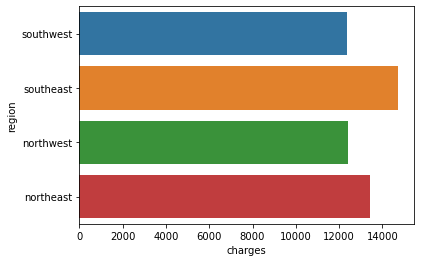

In [29]:
ax = sns.barplot(x='charges', y='region', data=df, ci=False)

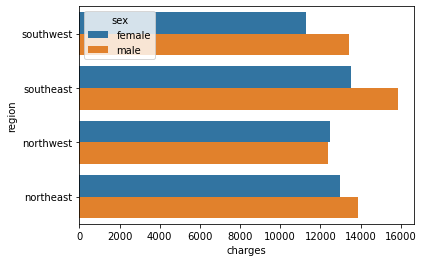

In [30]:
ax = sns.barplot(x='charges', y='region', data=df,hue='sex', ci=False)

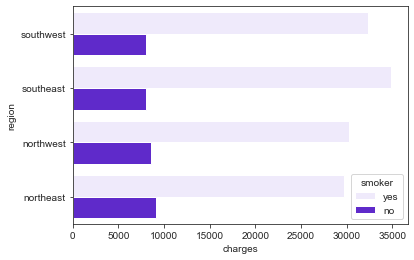

In [31]:
sns.set_style('ticks')
ax = sns.barplot(x = 'charges', y = 'region', hue = 'smoker', color = '#560FE5', data = df, orient = 'h', ci = False)

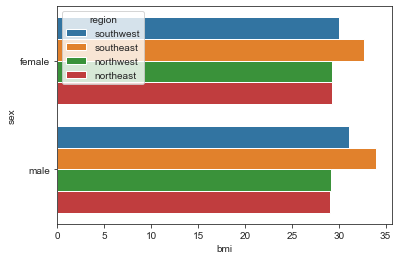

In [32]:
ax = sns.barplot(x='bmi', y='sex', data=df, hue='region', ci=False)

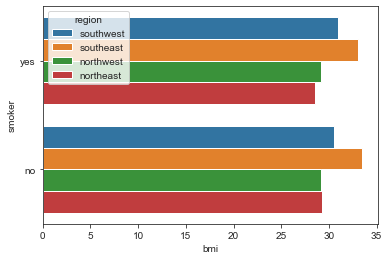

In [33]:
ax = sns.barplot(x='bmi', y='smoker', data=df, hue='region', ci=False)

In [34]:
dad = df['sex']=='male'
dad = df[dad]
dad

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
3,33,male,22.71,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.85520
8,37,male,29.83,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.94,1,no,northwest,4239.89265
1325,61,male,33.54,0,no,northeast,13143.33665
1327,51,male,30.03,1,no,southeast,9377.90470
1329,52,male,38.60,2,no,southwest,10325.20600


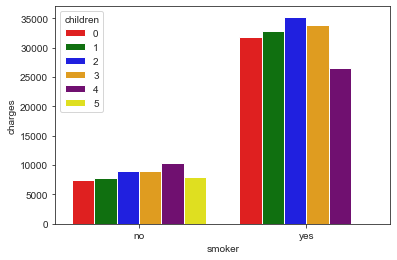

In [35]:
ax = sns.barplot(x = 'smoker', y = 'charges', hue = 'children', data = dad, palette = ["red", "green", "blue", 'orange', 'purple', 'yellow'], ci = False)

In [36]:
dad['children'].value_counts()

0    285
1    166
2    121
3     80
4     14
5     10
Name: children, dtype: int64

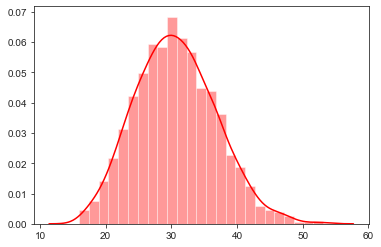

In [37]:
x = df['bmi'].values
sns.distplot(x, color='red')

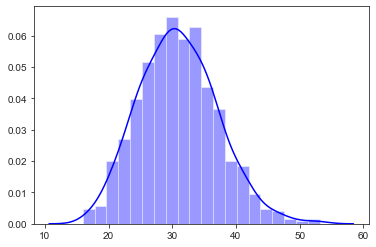

In [38]:
xd = dad['bmi'].values
sns.distplot(xd, color='blue')

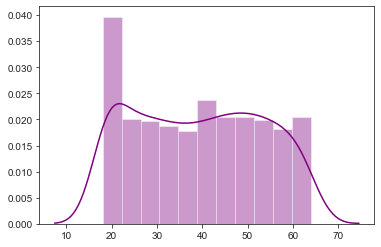

In [39]:
a = df['age'].values
sns.distplot(a, color='purple')

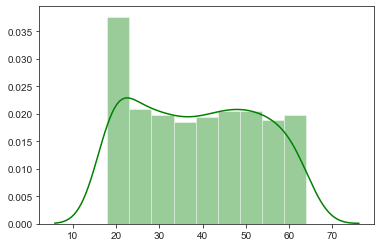

In [40]:
da = dad['age'].values
sns.distplot(da, color='green')

In [41]:
dad['age'].value_counts()

18    36
19    35
25    15
50    15
45    15
26    15
22    15
21    15
20    15
46    15
23    14
24    14
27    14
28    14
29    14
30    14
31    14
40    14
42    14
41    14
49    14
47    14
48    14
54    14
53    14
52    14
51    14
32    13
57    13
56    13
55    13
43    13
44    13
33    13
34    13
35    13
36    13
37    13
38    12
39    12
58    12
59    12
60    12
63    11
61    11
62    11
64    11
Name: age, dtype: int64

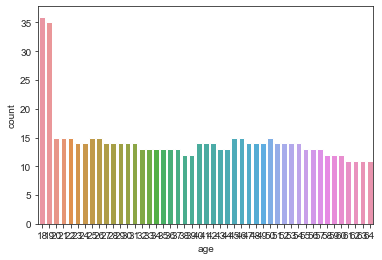

In [42]:
sns.countplot(dad['age'])

In [43]:
dad['age'].mean()

38.917159763313606

In [44]:
dad['age'].describe()

count    676.000000
mean      38.917160
std       14.050141
min       18.000000
25%       26.000000
50%       39.000000
75%       51.000000
max       64.000000
Name: age, dtype: float64

In [45]:
sdad = dad['smoker']=='yes'

In [46]:
dad[sdad]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
...,...,...,...,...,...,...,...
1301,62,male,30.88,3,yes,northwest,46718.16325
1303,43,male,27.80,0,yes,southwest,37829.72420
1304,42,male,24.61,2,yes,northeast,21259.37795
1307,32,male,28.12,4,yes,northwest,21472.47880


In [47]:
dad[sdad]['age'].describe()

count    159.000000
mean      38.446541
std       13.751247
min       18.000000
25%       27.000000
50%       38.000000
75%       49.500000
max       64.000000
Name: age, dtype: float64

In [48]:
dmean= dad['age'].mean()
dmean

#sns.barplot(x='age'< dmean, y='children', data=dad, hue='smoker', ci=False)

38.917159763313606

In [49]:
# dad's with ages young than the mean age for the entire dataset
daytm = dad['age'] < dmean
daytm
young_dads = dad[daytm]

#sns.barplot(x=daltm, y='children', data=dad, hue='smoker', ci=False)

In [50]:
young_dads

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
3,33,male,22.71,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.85520
8,37,male,29.83,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1315,18,male,28.31,1,no,northeast,11272.33139
1317,18,male,53.13,0,no,southeast,1163.46270
1318,35,male,39.71,4,no,northeast,19496.71917
1320,31,male,31.07,3,no,northwest,5425.02335


In [51]:
young_dads.describe()

,age,bmi,children,charges
count,334.000000,334.000000,334.000000,334.000000
mean,26.520958,30.447934,1.095808,10865.200219
std,6.400393,6.301219,1.245935,12520.774678
min,18.000000,15.960000,0.000000,1121.873900
25%,20.000000,26.142500,0.000000,2370.464675
50%,26.000000,30.130000,1.000000,4511.744325
75%,32.000000,34.400000,2.000000,17359.494650
max,38.000000,53.130000,5.000000,51194.559140


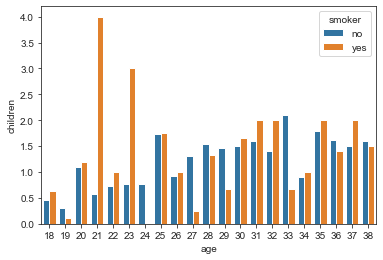

In [52]:
#x = young_dads['age']
sns.barplot(x=young_dads['age'], y='children', data=young_dads, hue='smoker', ci=False)

In [53]:
young_dads['smoker'].value_counts()

no     253
yes     81
Name: smoker, dtype: int64

In [54]:
# percentage of young dads who smoke
81/334

0.24251497005988024

In [55]:
round(young_dads['children'].mean())

1.0

In [56]:
young_dads['children'].describe()

count    334.000000
mean       1.095808
std        1.245935
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: children, dtype: float64

In [57]:
yng_dad_smk = young_dads['smoker']=='yes'

In [58]:
ydsm = young_dads[yng_dad_smk]['children'].value_counts()
ydsm

0    36
1    17
2    14
3    11
4     3
Name: children, dtype: int64

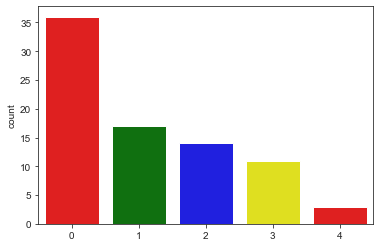

In [59]:
xy = young_dads[yng_dad_smk]['children'].values
sns.countplot(xy, palette = ["red", "green", "blue", "yellow"])

In [60]:
# dad's with ages older than the mean age for the entire dataset
daotm = dad['age'] > dmean
daotm
older_dads = dad[daotm]

In [61]:
older_dads

,age,sex,bmi,children,smoker,region,charges
18,56,male,40.30,0,no,southwest,10602.38500
33,63,male,28.31,0,no,northwest,13770.09790
39,60,male,39.90,0,yes,southwest,48173.36100
42,41,male,21.78,1,no,southeast,6272.47720
45,55,male,37.30,0,no,southwest,20630.28351
...,...,...,...,...,...,...,...
1322,62,male,38.83,0,no,southeast,12981.34570
1325,61,male,33.54,0,no,northeast,13143.33665
1327,51,male,30.03,1,no,southeast,9377.90470
1329,52,male,38.60,2,no,southwest,10325.20600


In [62]:
older_dads.describe()

,age,bmi,children,charges
count,342.000000,342.000000,342.000000,342.000000
mean,51.023392,31.429064,1.134503,16975.985155
std,7.297574,5.947854,1.193596,12706.114900
min,39.000000,18.340000,0.000000,5415.661200
25%,45.000000,26.605000,0.000000,8710.899313
50%,51.000000,31.350000,1.000000,11354.944250
75%,57.000000,35.860000,2.000000,21662.594787
max,64.000000,49.060000,5.000000,62592.873090


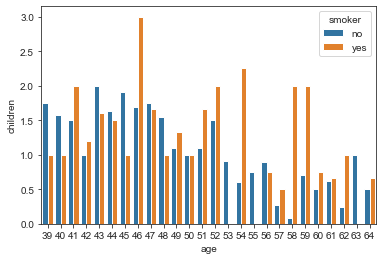

In [63]:
sns.barplot(x=older_dads['age'], y='children', data=older_dads, hue='smoker', ci=False)

In [64]:
older_dads['smoker'].value_counts()

no     264
yes     78
Name: smoker, dtype: int64

In [65]:
# percentage of older dads who smoke
78/342

0.22807017543859648

In [66]:
old_dad_smk = older_dads['smoker']=='yes'

In [67]:
odsm = older_dads[old_dad_smk]['children'].value_counts()
odsm

0    26
2    19
1    19
3    14
Name: children, dtype: int64

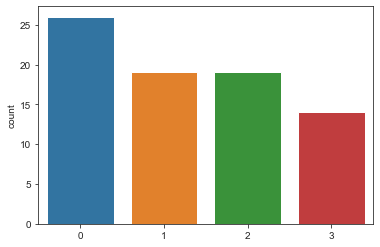

In [68]:
x=older_dads[old_dad_smk]['children'].values

sns.countplot(x)

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1a4579d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a4579d0>)

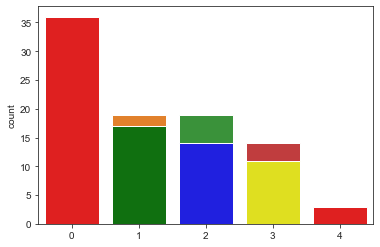

In [69]:
#plot the number for older and younger smoking dads side by side??
(sns.countplot(x),  sns.countplot(xy, palette = ["red", "green", "blue", "yellow"]))

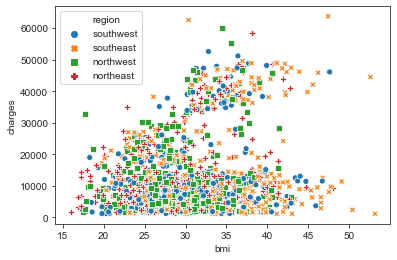

In [70]:
ax =sns.scatterplot(x = 'bmi' , y = 'charges', data = df, hue = 'region', sizes = (20, 200), style = 'region')

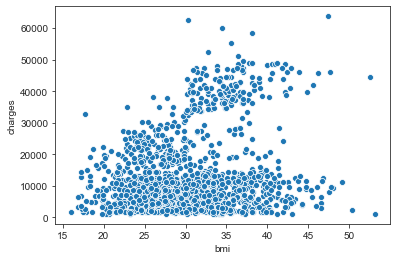

In [71]:
ax =sns.scatterplot(x = 'bmi' , y = 'charges', data = df)

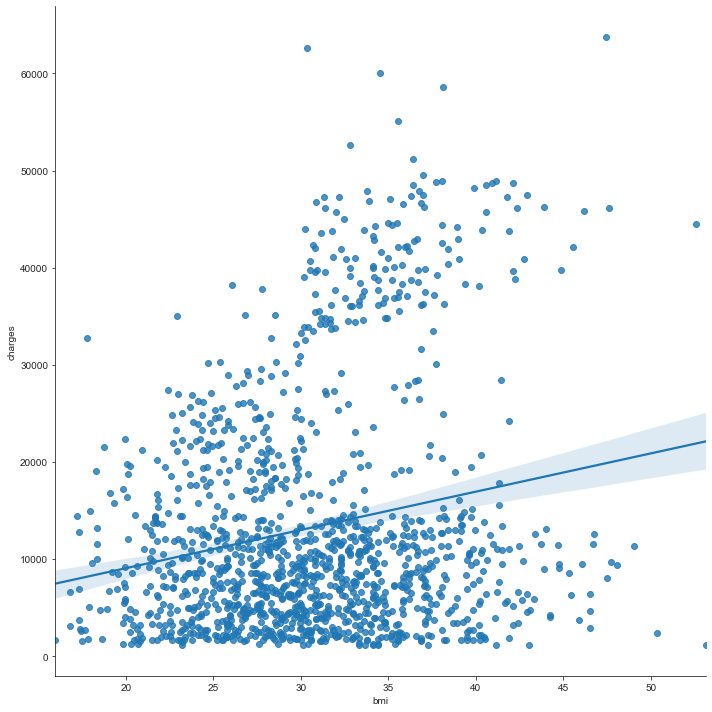

In [72]:
ax = sns.lmplot(x = "bmi", y = "charges", data = df, height = 10, aspect = 1)

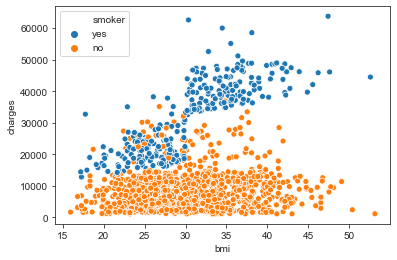

In [73]:
ax =sns.scatterplot(x = 'bmi' , y = 'charges', data = df, hue = 'smoker', sizes = (50, 200))

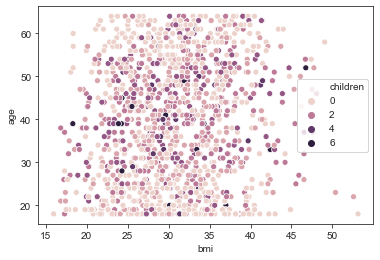

In [74]:
ax =sns.scatterplot(x = 'bmi' , y = 'age', data = df, hue = 'children', sizes = (40, 200))

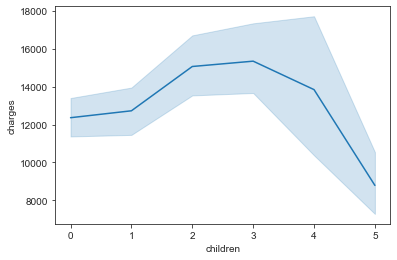

In [75]:
ax = sns.lineplot(x = "children", y = "charges", data = df)

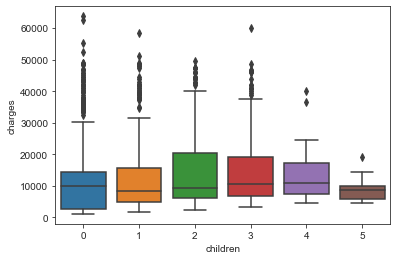

In [76]:
ax = sns.boxplot(x = "children", y = "charges", data = df)

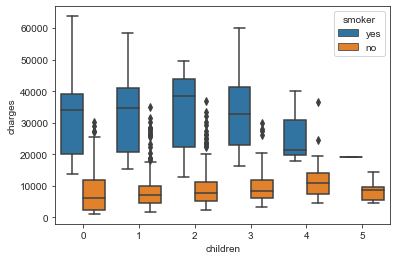

In [77]:
ax = sns.boxplot(x = "children", y = "charges", data = df, hue='smoker')

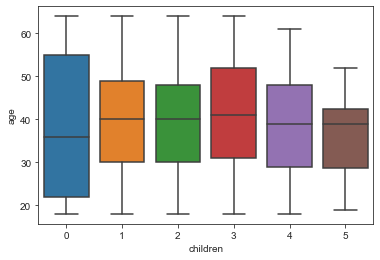

In [78]:
ax = sns.boxplot(x = "children", y = "age", data = df)

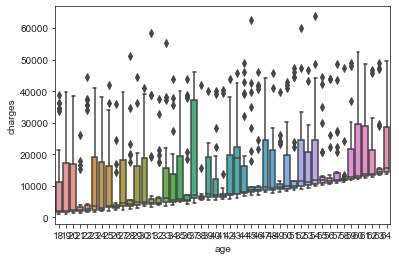

In [79]:
ax = sns.boxplot(x = "age", y = "charges", data = df)

In [80]:
max = df['charges'].max()
max

63770.42801

In [81]:
max_chrg = df['charges']==max

In [82]:
df[max_chrg]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [83]:
max_child = df['children'].max()
maxc = df['children']==max_child
df[maxc]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.60,5,no,southwest,4687.79700
71,31,male,28.50,5,no,northeast,6799.45800
166,20,female,37.00,5,no,southwest,4830.63000
413,25,male,23.90,5,no,southwest,5080.09600
425,45,male,24.31,5,no,southeast,9788.86590
438,52,female,46.75,5,no,southeast,12592.53450
568,49,female,31.90,5,no,southwest,11552.90400
640,33,male,42.40,5,no,southwest,6666.24300
877,33,male,33.44,5,no,southeast,6653.78860
932,46,male,25.80,5,no,southwest,10096.97000


In [84]:
# not much difference between BMI of smokers and non-smokers
df.groupby('smoker').agg(np.mean)[['bmi']].round(2)

,bmi
smoker,
no,30.65
yes,30.71


In [85]:
df.groupby(['sex', 'smoker']).agg(np.mean)[['bmi']].round(2)

bmi
sex    smoker       
female no      30.54
       yes     29.61
male   no      30.77
       yes     31.51

In [86]:
# Is the difference is BMI by region statistically significant?
df.groupby('region').agg(np.mean)[['bmi']].round(2)

,bmi
region,
northeast,29.18
northwest,29.20
southeast,33.36
southwest,30.60


In [87]:
df.groupby(['region', 'smoker']).agg(np.mean)[['bmi']].round(2)

bmi
region    smoker       
northeast no      29.33
          yes     28.57
northwest no      29.22
          yes     29.14
southeast no      33.44
          yes     33.10
southwest no      30.51
          yes     31.01

In [88]:
df.groupby(['region', 'sex']).agg(np.mean)[['children']].round(2)

children
region    sex             
northeast female      1.01
          male        1.09
northwest female      1.12
          male        1.18
southeast female      1.05
          male        1.05
southwest female      1.12
          male        1.16

In [89]:
women = df['sex']=='female'

In [90]:
women = df[women]

In [91]:
women

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [92]:
women['charges'].mean()

12569.578843835347

In [93]:
# you will need to create a correlation dataset, all numeric values
# default .corr() is a pearson correlation giving value of -1 to 1

corr_women = women[['age', 'bmi', 'children','charges']].corr()
corr_women

,age,bmi,children,charges
age,1.000000,0.097213,0.078500,0.324575
bmi,0.097213,1.000000,0.022158,0.161404
children,0.078500,0.022158,1.000000,0.058492
charges,0.324575,0.161404,0.058492,1.000000


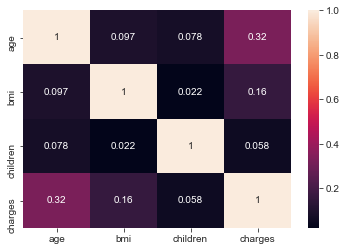

In [94]:
hm_wom = sns.heatmap(corr_women, annot = True)

In [95]:
hm_wom

In [96]:
men = df['sex']=='male'

In [97]:
men = df[men]
men

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
3,33,male,22.71,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.85520
8,37,male,29.83,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.94,1,no,northwest,4239.89265
1325,61,male,33.54,0,no,northeast,13143.33665
1327,51,male,30.03,1,no,southeast,9377.90470
1329,52,male,38.60,2,no,southwest,10325.20600


In [98]:
men['charges'].mean()

13956.751177721893

In [99]:
# you will need to create a correlation dataset, all numeric values
# default .corr() is a pearson correlation giving value of -1 to 1

corr_men = men[['age', 'bmi', 'children','charges']].corr()
corr_men

,age,bmi,children,charges
age,1.000000,0.123101,0.008690,0.282369
bmi,0.123101,1.000000,0.002392,0.225853
children,0.008690,0.002392,1.000000,0.074496
charges,0.282369,0.225853,0.074496,1.000000


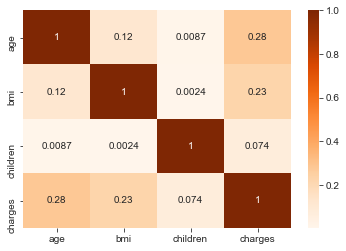

In [100]:
hm_men = sns.heatmap(corr_men, annot = True, cmap = 'Oranges')

In [101]:
# women with children
cw = women['children']!=0

In [102]:
wwc = women[cw]
wwc

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
16,52,female,30.78,1,no,northeast,10797.33620
21,30,female,32.40,1,no,southwest,4149.73600
23,34,female,31.92,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1319,39,female,26.32,2,no,northwest,7201.70085
1323,42,female,40.37,2,yes,southeast,43896.37630
1328,23,female,24.23,2,no,northeast,22395.74424
1330,57,female,25.74,2,no,southeast,12629.16560


In [103]:
# average charges for women with children
wwc['charges'].mean()

13083.940399329756

In [104]:
wwc['smoker'].value_counts()

no     311
yes     62
Name: smoker, dtype: int64

In [105]:
corr_wwc = wwc[['age', 'bmi', 'children','charges']].corr()
corr_wwc

,age,bmi,children,charges
age,1.000000,0.161494,0.054137,0.296395
bmi,0.161494,1.000000,0.043909,0.155423
children,0.054137,0.043909,1.000000,0.037752
charges,0.296395,0.155423,0.037752,1.000000


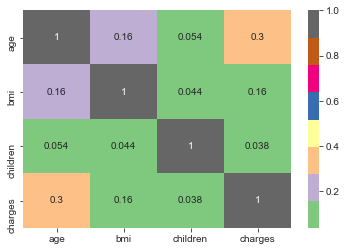

In [106]:
hm_wwc = sns.heatmap(corr_wwc, annot = True, cmap = 'Accent')

In [107]:
# women without children
noc_w = women['children']==0

In [108]:
w_wo_child = women[noc_w]

In [109]:
w_wo_child

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [110]:
corr_wno_child = w_wo_child[['age', 'bmi','charges']].corr()
corr_wno_child

,age,bmi,charges
age,1.000000,0.038198,0.350028
bmi,0.038198,1.000000,0.169402
charges,0.350028,0.169402,1.000000


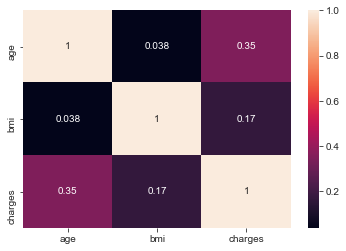

In [111]:
hm_wno_child = sns.heatmap(corr_wno_child, annot = True)

In [112]:
# men with children
mwc = men['children']!=0

In [113]:
men_with_child = men[mwc]

In [114]:
men_with_child

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
8,37,male,29.83,2,no,northeast,6406.41070
15,19,male,24.60,1,no,southwest,1837.23700
24,37,male,28.03,2,no,northwest,6203.90175
...,...,...,...,...,...,...,...
1320,31,male,31.07,3,no,northwest,5425.02335
1324,31,male,25.94,1,no,northwest,4239.89265
1327,51,male,30.03,1,no,southeast,9377.90470
1329,52,male,38.60,2,no,southwest,10325.20600


In [115]:
men_with_child['charges'].mean()

14776.074748005116

In [116]:
men_with_child['smoker'].value_counts()

no     294
yes     97
Name: smoker, dtype: int64

In [117]:
corr_mwc = men_with_child[['age', 'bmi','charges']].corr()
corr_mwc

,age,bmi,charges
age,1.000000,0.108594,0.270739
bmi,0.108594,1.000000,0.256376
charges,0.270739,0.256376,1.000000


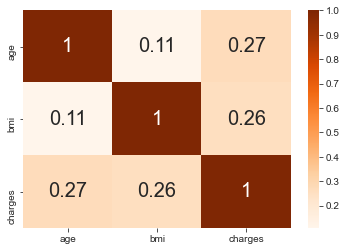

In [118]:
hm_men = sns.heatmap(corr_mwc, annot = True, annot_kws = {'size':'20'},cmap = 'Oranges')

In [119]:
# men without children
mno_c = men['children']==0

In [120]:
men_without_child = men[mno_c]
men_without_child

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.71,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.85520
10,25,male,26.22,0,no,northeast,2721.32080
12,23,male,34.40,0,no,southwest,1826.84300
14,27,male,42.13,0,yes,southeast,39611.75770
...,...,...,...,...,...,...,...
1303,43,male,27.80,0,yes,southwest,37829.72420
1317,18,male,53.13,0,no,southeast,1163.46270
1321,62,male,26.70,0,yes,northeast,28101.33305
1322,62,male,38.83,0,no,southeast,12981.34570


In [121]:
men_without_child['charges'].mean()

12832.69673568421

In [122]:
men_without_child['smoker'].value_counts()

no     223
yes     62
Name: smoker, dtype: int64

In [123]:
corr_men_no_child = men_without_child[['age', 'bmi','charges']].corr()
corr_men_no_child

,age,bmi,charges
age,1.000000,0.139896,0.303087
bmi,0.139896,1.000000,0.178174
charges,0.303087,0.178174,1.000000


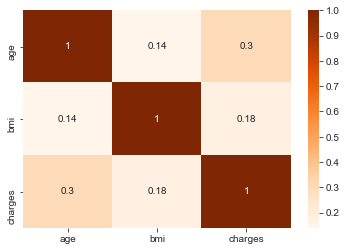

In [124]:
hm_men_no_child = sns.heatmap(corr_men_no_child, annot = True, cmap = 'Oranges')

In [125]:
women2 = df['sex']=='female' 

In [126]:
women2

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334     True
1335     True
1336     True
1337     True
Name: sex, Length: 1338, dtype: bool

In [127]:
women2 = df[women2]

In [128]:
women2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [129]:
w2_no_smoke = women2['smoker']=='no'

In [130]:
w2_no_smoke

0       False
5        True
6        True
7        True
9        True
        ...  
1332     True
1334     True
1335     True
1336     True
1337    False
Name: smoker, Length: 662, dtype: bool

In [131]:
non_smoker_women = women2[w2_no_smoke]

In [132]:
non_smoker_women

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


In [133]:
non_smoker_women['charges'].mean()

8762.297299541133

In [134]:
corr_non_smoke_women = non_smoker_women[['age', 'bmi','charges']].corr()
corr_non_smoke_women

,age,bmi,charges
age,1.000000,0.089148,0.621786
bmi,0.089148,1.000000,0.075089
charges,0.621786,0.075089,1.000000


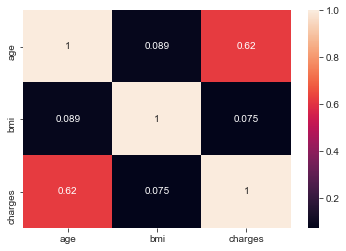

In [135]:
# Higher correlation between age and charges
hm_non_smoke_women = sns.heatmap(corr_non_smoke_women, annot = True)

In [136]:
corr_non_smoke_women_child = non_smoker_women[['age', 'children','charges']].corr()
corr_non_smoke_women_child

,age,children,charges
age,1.000000,0.079141,0.621786
children,0.079141,1.000000,0.176355
charges,0.621786,0.176355,1.000000


In [137]:
non_smoker_women

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


In [138]:
corr_non_smoke_women_bmi_child = non_smoker_women[['bmi', 'children','charges']].corr()
corr_non_smoke_women_bmi_child

,bmi,children,charges
bmi,1.000000,0.051114,0.075089
children,0.051114,1.000000,0.176355
charges,0.075089,0.176355,1.000000


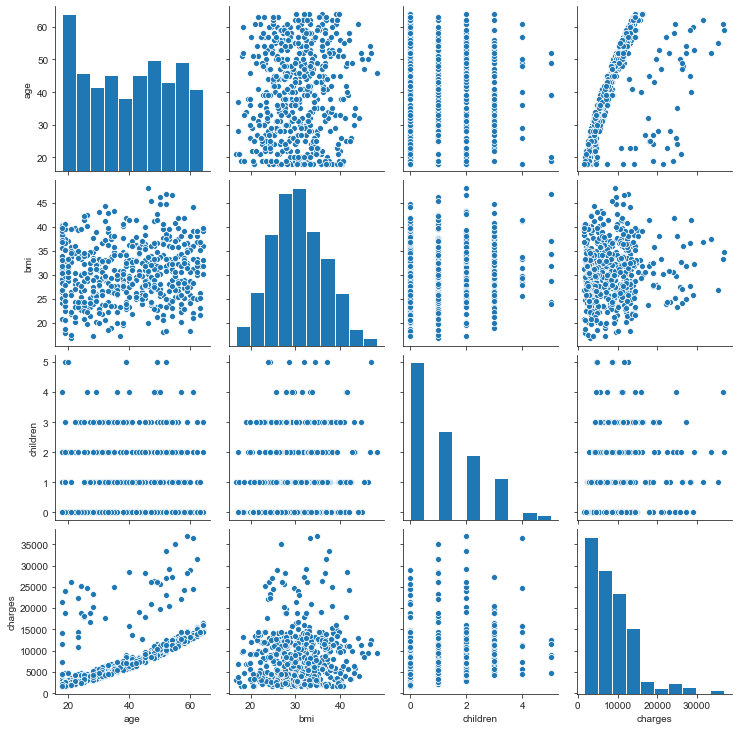

In [139]:
sns.pairplot(non_smoker_women)

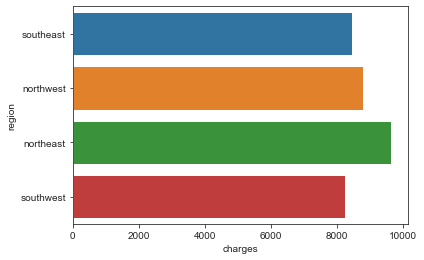

In [140]:
ax = sns.barplot(x='charges', y='region', data=non_smoker_women, ci=False)

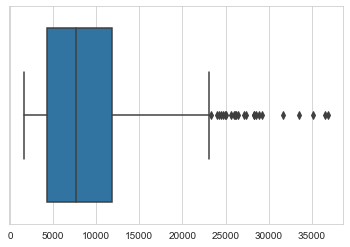

In [141]:
sns.set_style('whitegrid')
x = non_smoker_women['charges'].values
ax = sns.boxplot(x)

In [142]:
# look at non-smoking women below 23K in charges
lower_cost = non_smoker_women['charges']<23000

In [143]:
lower_non_smoke_wom = non_smoker_women[lower_cost].sort_values(by='charges', ascending=False)

In [144]:
lower_non_smoke_wom.describe()

,age,bmi,children,charges
count,522.000000,522.000000,522.000000,522.000000
mean,39.350575,30.507854,1.078544,7849.292432
std,13.968902,5.920066,1.206015,4413.552466
min,18.000000,16.820000,0.000000,1607.510100
25%,27.000000,26.340000,0.000000,4134.942512
50%,39.000000,30.170000,1.000000,7346.934300
75%,51.000000,34.207500,2.000000,11181.634525
max,64.000000,48.070000,5.000000,22395.744240


In [145]:
lower_non_smoke_wom['region'].value_counts()

southwest    137
southeast    132
northwest    129
northeast    124
Name: region, dtype: int64

In [146]:
lower_non_smoke_wom.sort_values(by='bmi', ascending=False)

,age,sex,bmi,children,smoker,region,charges
286,46,female,48.07,2,no,northeast,9432.92530
438,52,female,46.75,5,no,southeast,12592.53450
547,54,female,46.70,2,no,southwest,11538.42100
941,50,female,46.09,1,no,southeast,9549.56510
1024,47,female,45.32,1,no,southeast,8569.86180
...,...,...,...,...,...,...,...
232,19,female,17.80,0,no,southwest,1727.78500
680,21,female,17.40,1,no,southwest,2585.26900
1286,28,female,17.29,0,no,northeast,3732.62510
1029,37,female,17.29,2,no,northeast,6877.98010


In [147]:
corr_lower_non_smoke_wom = lower_non_smoke_wom[['age', 'children', 'bmi','charges']].corr()
corr_lower_non_smoke_wom

,age,children,bmi,charges
age,1.000000,0.087799,0.083057,0.766983
children,0.087799,1.000000,0.041376,0.204511
bmi,0.083057,0.041376,1.000000,0.073421
charges,0.766983,0.204511,0.073421,1.000000


In [148]:
lower_non_smoke_wom['age'].mean()

39.35057471264368

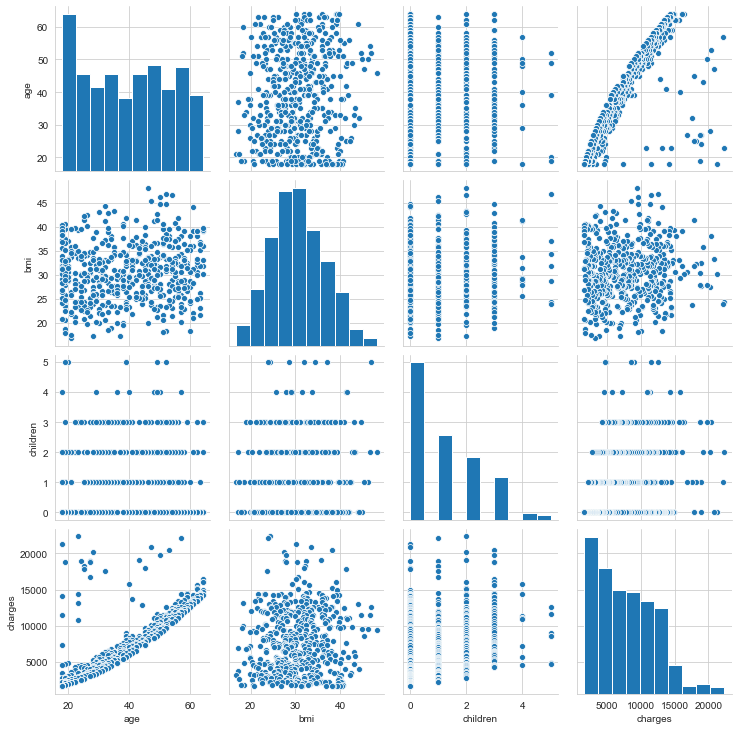

In [149]:
sns.pairplot(lower_non_smoke_wom)

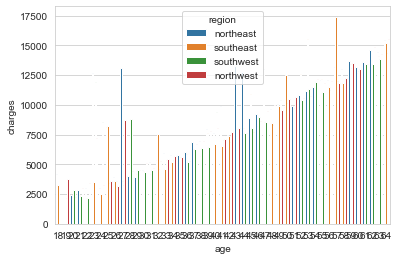

In [150]:
sns.barplot(x='age', y='charges', data=lower_non_smoke_wom, hue='region', ci=False)

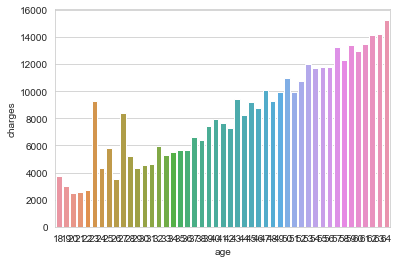

In [151]:
sns.barplot(x='age', y='charges', data=lower_non_smoke_wom, ci=False)

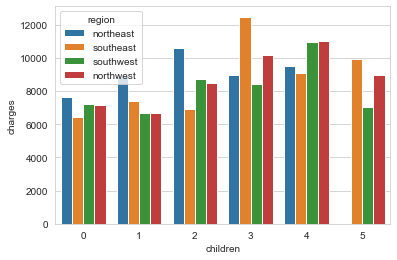

In [152]:
sns.barplot(x='children', y='charges', data=lower_non_smoke_wom, hue='region', ci=False)

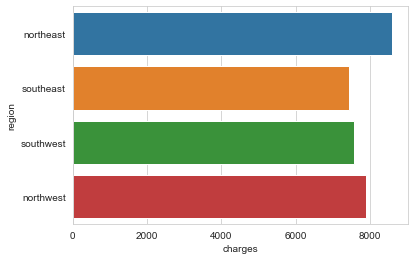

In [153]:
sns.barplot(x='charges', y='region', data=lower_non_smoke_wom, ci=False)

In [154]:
mask_region = lower_non_smoke_wom.groupby('region')

In [155]:
mask_region['charges'].mean()

region
northeast    8578.708377
northwest    7883.365568
southeast    7424.677787
southwest    7566.125437
Name: charges, dtype: float64

In [156]:
non_smoker_women['charges'].mean()

8762.297299541133

In [157]:
lower_non_smoke_wom['charges'].mean()

7849.292432354407

In [158]:
lower_non_smoke_wom.describe()

,age,bmi,children,charges
count,522.000000,522.000000,522.000000,522.000000
mean,39.350575,30.507854,1.078544,7849.292432
std,13.968902,5.920066,1.206015,4413.552466
min,18.000000,16.820000,0.000000,1607.510100
25%,27.000000,26.340000,0.000000,4134.942512
50%,39.000000,30.170000,1.000000,7346.934300
75%,51.000000,34.207500,2.000000,11181.634525
max,64.000000,48.070000,5.000000,22395.744240


In [159]:
lower_non_smoke_wom.describe()

,age,bmi,children,charges
count,522.000000,522.000000,522.000000,522.000000
mean,39.350575,30.507854,1.078544,7849.292432
std,13.968902,5.920066,1.206015,4413.552466
min,18.000000,16.820000,0.000000,1607.510100
25%,27.000000,26.340000,0.000000,4134.942512
50%,39.000000,30.170000,1.000000,7346.934300
75%,51.000000,34.207500,2.000000,11181.634525
max,64.000000,48.070000,5.000000,22395.744240


In [160]:
# model high cost non smoking women 
formula = 'charges ~ age + children + C(region)'

In [161]:
train, test = statsmodels_train_test_split(lower_non_smoke_wom)

In [162]:
model = smf.ols(formula = formula, data=lower_non_smoke_wom).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 27 Sep 2020   Prob (F-statistic):          4.31e-105
Time:                        12:10:25   Log-Likelihood:                -4870.5
No. Observations:                 522   AIC:                             9753.
Df Residuals:                     516   BIC:                             9779.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1333.7513    425.270     -3.136      0.002   -2169.225    -498.278
C(region)[T.northwest]  -874.5918    346.005     -2.528      0.012   -1554.343    -194.841
C(region)[T.southeast]  -945.0618    343.743     -2.749      0.006   -1620.370    -269.754
C(region)[T.southwest] -1163.8599    340.785     -3.415      0.001   -1833.357    -494.363
age                      238.1500      8.648     27.537      0.000     221.160     255.140
children                 530.6017    100.368      5.287      0.000     333.422     727.781
==============================================================================
Omnibus:                      480.423   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9428.136
Skew:                           4.259   Prob(JB):                         0.00
Kurtosis:                      21.998   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
lower_non_smoke_wom.head()

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.23,2,no,northeast,22395.74424
661,57,female,23.98,1,no,southeast,22192.43711
102,18,female,30.12,0,no,northeast,21344.84670
473,47,female,33.35,0,no,northeast,20878.78443
264,53,female,38.06,3,no,southeast,20462.99766


In [164]:
test.head()

,sex,bmi,children,smoker,region,charges,age
831,female,25.84,0,no,northwest,5266.3656,36
1073,female,28.88,2,no,northeast,12096.6512,54
1029,female,17.29,2,no,northeast,6877.9801,37
472,female,29.80,0,no,southwest,1744.4650,19
286,female,48.07,2,no,northeast,9432.9253,46


In [165]:
model.params

Intercept                -1333.751268
C(region)[T.northwest]    -874.591771
C(region)[T.southeast]    -945.061809
C(region)[T.southwest]   -1163.859940
age                        238.150010
children                   530.601729
dtype: float64

In [166]:
y_pred_test = model.predict(test)
y_pred_test

831      6365.057306
1073    12587.552709
1029     8539.002546
472      2027.238974
286     10682.352632
            ...     
1016     2847.108872
1163     2952.948904
102      2952.948904
1164     8086.409083
720     10811.899221
Length: 131, dtype: float64

In [167]:
r2_score(test['charges'], y_pred_test)

0.5100266748697573

In [168]:
mean_squared_error(test['charges'], y_pred_test)

9969910.673128044

In [169]:
# sns.set_style('ticks')
# ax = sns.barplot(x = 'charges', y = 'region', hue = 'smoker', color = '#560FE5', data = df, orient = 'h', ci = False)

In [170]:
men2 = df['sex']=='male'

In [171]:
df_men2 = df[men2]

In [172]:
df_men2

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
3,33,male,22.71,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.85520
8,37,male,29.83,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.94,1,no,northwest,4239.89265
1325,61,male,33.54,0,no,northeast,13143.33665
1327,51,male,30.03,1,no,southeast,9377.90470
1329,52,male,38.60,2,no,southwest,10325.20600


In [173]:
nsm = df_men2['smoker']=='no'

In [174]:
non_smoke_men = df_men2[nsm]

In [175]:
non_smoke_men

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
3,33,male,22.71,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.85520
8,37,male,29.83,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.94,1,no,northwest,4239.89265
1325,61,male,33.54,0,no,northeast,13143.33665
1327,51,male,30.03,1,no,southeast,9377.90470
1329,52,male,38.60,2,no,southwest,10325.20600


In [176]:
non_smoke_men['charges'].mean()

8087.204731276595

In [177]:
corr_non_smoke_men = non_smoke_men[['age', 'children','charges']].corr()
corr_non_smoke_men

,age,children,charges
age,1.000000,-0.013316,0.634549
children,-0.013316,1.000000,0.100066
charges,0.634549,0.100066,1.000000


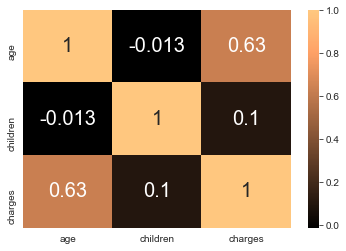

In [178]:
# Higher correlation between age and charges
hm_non_smoke_men = sns.heatmap(corr_non_smoke_men, annot = True, annot_kws = {'size':'20'},cmap = 'copper')

In [179]:
high_non_smoke_wom

NameError: name 'high_non_smoke_wom' is not defined

In [ ]:
age_mask = high_non_smoke_wom['age']>30

In [ ]:
high_nsw_over_thirty = high_non_smoke_wom[age_mask]

In [ ]:
high_nsw_over_thirty

In [ ]:
high_nsw_over_thirty.describe()

In [ ]:
high_nsw_over_thirty['region'].value_counts()

In [ ]:
high_nsw_over_thirty['children'].value_counts()

In [ ]:
hot = high_nsw_over_thirty['children'].values
sns.countplot(hot)

In [ ]:
sns.pairplot(high_nsw_over_thirty)

In [ ]:
corr_high_nsw_over_thirty = high_nsw_over_thirty[['age', 'children', 'bmi','charges']].corr()
corr_high_nsw_over_thirty

In [ ]:
ax =sns.scatterplot(x = 'children' , y = 'charges', data = high_nsw_over_thirty)

In [ ]:
hcnsw_nochild = high_non_smoke_wom['children']==0

In [ ]:
df_nochild = high_non_smoke_wom[hcnsw_nochild]
df_nochild

In [ ]:
df_nochild.describe()

In [ ]:
ax = sns.barplot(x='charges', y='region', data=df_nochild, ci=False)

In [ ]:
df_nochild.region.value_counts()

In [ ]:
mask = df_nochild.groupby('region')['charges'].mean()

In [ ]:
mask

In [ ]:
df_nochild['charges'].mean()

In [ ]:
round((25509.352637142852/28923.13692),2)